<a href="https://colab.research.google.com/github/darshanjaino7/Predicting-a-patient-has-heart-disease-or-not-using-data-science/blob/main/IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pan
#we include this to use data structures and operations for manupulating neumerical tables
import numpy as np
#numPy contains a multi-dimensional array and matrix data structures 
import matplotlib.pyplot as mplot
import seaborn as sbrn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import os

#Here we have imported useful libraries


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#to mount our google drive

Mounted at /content/drive


In [ ]:
data_set=pan.read_csv('/content/drive/My Drive/heart_3.csv')
# Reading data from the given path 

In [ ]:
data_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
data_set.replace('?',-1,inplace=True)
data_set[data_set==-1].count()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

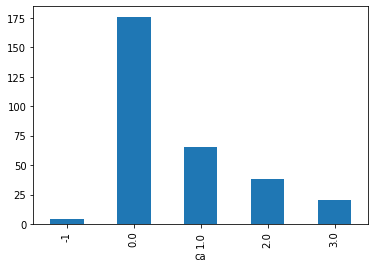

In [ ]:
wca=data_set.groupby('ca')['ca'].count()
wca.plot(kind='bar')
#checking what values are most frequently present in ca

In [ ]:
mvar1=data_set.ca.mode()[0]
data_set.ca=data_set.ca.replace(-1,mvar1)
#Replacing NaN values with most frequently available values

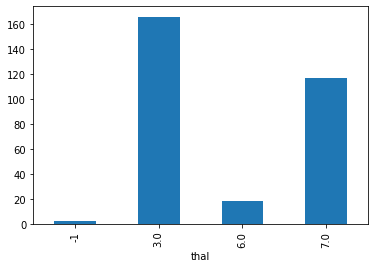

In [ ]:
wthal=data_set.groupby('thal')['thal'].count()
wthal.plot(kind='bar')

In [ ]:
mvar2=data_set.thal.mode()[0]
data_set.thal=data_set.thal.replace(-1,mvar2)

In [ ]:
data_set.num.value_counts()
#0 represents no risk
#1,2,3,4 represent increasing order of risk
# below number shows patient belonging to each category

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

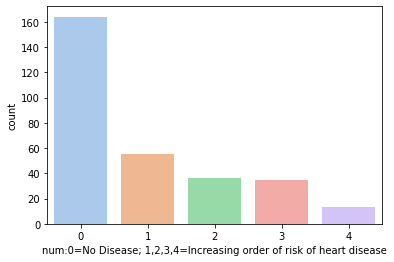

In [ ]:
sbrn.countplot(x="num", data=data_set, palette="pastel")
mplot.xlabel("num:0=No Disease; 1,2,3,4=Increasing order of risk of heart disease")
mplot.show()

In [ ]:
count_healthy = len(data_set[data_set.num == 0])
count_unhealthy = len(data_set[data_set.num == 1])+len(data_set[data_set.num == 2])+len(data_set[data_set.num == 3])+len(data_set[data_set.num == 4])
print("Patients with no heart disease (%): {:.5f}%".format((count_healthy / (len(data_set.num))*100)))
print("patients with heart disease: {:.5f}%".format((count_unhealthy / (len(data_set.num))*100)))


Patients with no heart disease (%): 54.12541%
patients with heart disease: 45.87459%


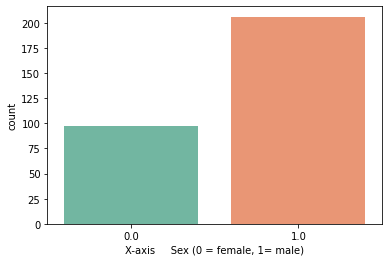

In [ ]:
sbrn.countplot(x='sex', data=data_set, palette="Set2")
mplot.xlabel("X-axis     Sex (0 = female, 1= male)")
mplot.show()

In [ ]:
No_of_female = len(data_set[data_set.sex == 0])
No_of_male = len(data_set[data_set.sex == 1])
print("Female patients(%): {:.4f}%".format((No_of_female / (len(data_set.sex))*100)))
print("Male Patients(%)  : {:.4f}%".format((No_of_male / (len(data_set.sex))*100)))

Female patients(%): 32.0132%
Male Patients(%)  : 67.9868%


In [ ]:
data_set.groupby('num').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
num,,,,,,,,,,,
0,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537
1,55.381818,0.836364,3.345455,133.254545,249.109091,0.072727,1.163636,145.927273,0.454545,1.005455,1.636364
2,58.027778,0.805556,3.750000,134.194444,259.277778,0.250000,0.916667,135.583333,0.611111,1.780556,1.888889
3,56.000000,0.800000,3.771429,135.457143,246.457143,0.228571,1.285714,132.057143,0.657143,1.962857,1.971429
4,59.692308,0.846154,3.692308,138.769231,253.384615,0.076923,1.615385,140.615385,0.461538,2.361538,2.076923


In [ ]:
data_set.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


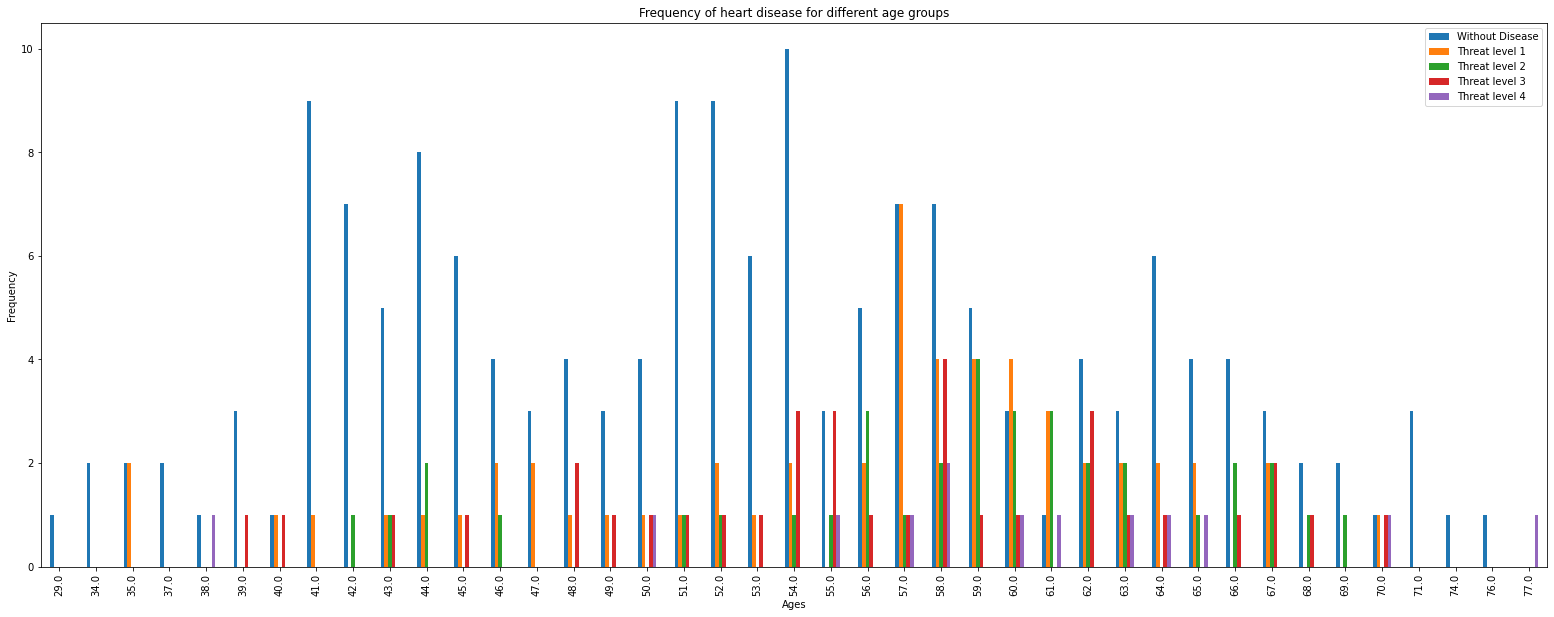

In [ ]:
pan.crosstab(data_set.age,data_set.num).plot(kind="bar",figsize=(27,10))
mplot.xlabel('Ages')
mplot.ylabel('Frequency')
mplot.title('Frequency of heart disease for different age groups')
mplot.savefig('FrequencyVsage.png')
mplot.legend(["Without Disease","Threat level 1","Threat level 2","Threat level 3","Threat level 4"])
mplot.show()

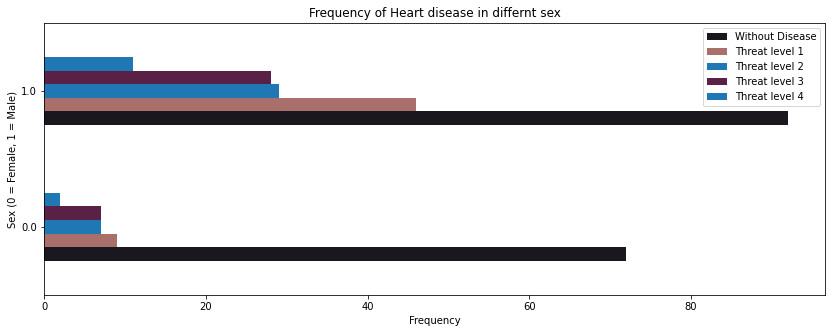

In [ ]:
pan.crosstab(data_set.sex,data_set.num).plot(kind="barh",figsize=(14,5),color=['#1b171f','#a96f6a','#1f77b4','#592145','#1f77b4'])
mplot.title('Frequency of Heart disease in differnt sex')
mplot.ylabel('Sex (0 = Female, 1 = Male)')
mplot.legend(["Without Disease","Threat level 1","Threat level 2","Threat level 3","Threat level 4"])
mplot.xlabel('Frequency')
mplot.show()

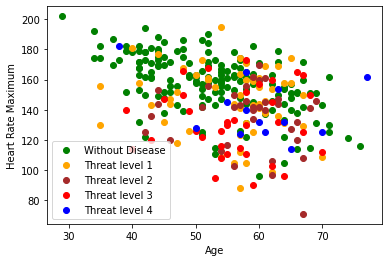

In [ ]:
mplot.scatter(x=data_set.age[data_set.num==0], y=data_set.thalach[(data_set.num==0)],c="green")
mplot.scatter(x=data_set.age[data_set.num==1], y=data_set.thalach[(data_set.num==1)],c="orange")
mplot.scatter(x=data_set.age[data_set.num==2], y=data_set.thalach[(data_set.num==2)],c="brown")
mplot.scatter(x=data_set.age[data_set.num==3], y=data_set.thalach[(data_set.num==3)],c="red")
mplot.scatter(x=data_set.age[data_set.num==4], y=data_set.thalach[(data_set.num==4)],c="blue")
mplot.legend(["Without Disease","Threat level 1","Threat level 2","Threat level 3","Threat level 4"])
mplot.xlabel("Age")
mplot.ylabel("Heart Rate Maximum")
mplot.show()

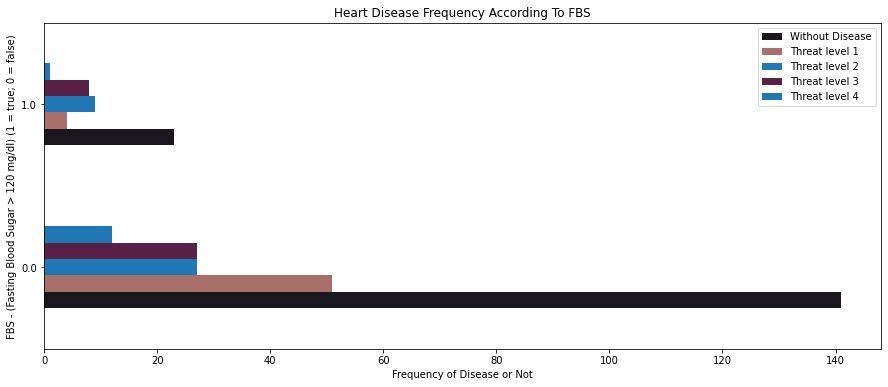

In [ ]:
pan.crosstab(data_set.fbs,data_set.num).plot(kind="barh",figsize=(15,6),color=['#1b171f','#a96f6a','#1f77b4','#592145','#1f77b4'])
mplot.title('Heart Disease Frequency According To FBS')
mplot.ylabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
mplot.legend(["Without Disease","Threat level 1","Threat level 2","Threat level 3","Threat level 4"])
mplot.xlabel('Frequency of Disease or Not')
mplot.show()

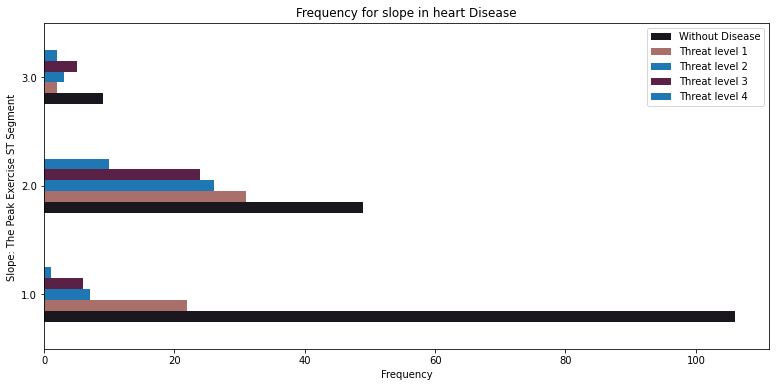

In [ ]:
pan.crosstab(data_set.slope,data_set.num).plot(kind="barh",figsize=(13,6),color=['#1b171f','#a96f6a','#1f77b4','#592145','#1f77b4'])
mplot.title('Frequency for slope in heart Disease')
mplot.ylabel('Slope: The Peak Exercise ST Segment ')
mplot.xlabel('Frequency')
mplot.legend(["Without Disease","Threat level 1","Threat level 2","Threat level 3","Threat level 4"])
mplot.show()


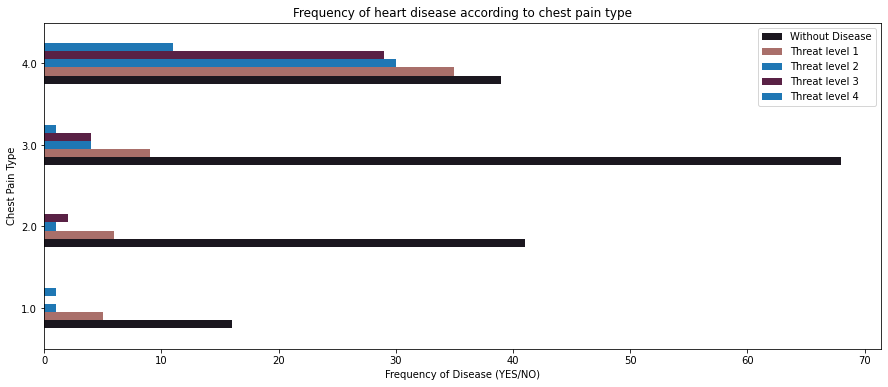

In [ ]:
pan.crosstab(data_set.cp,data_set.num).plot(kind="barh",figsize=(15,6),color=['#1b171f','#a96f6a','#1f77b4','#592145','#1f77b4'])
mplot.title('Frequency of heart disease according to chest pain type')
mplot.ylabel('Chest Pain Type')
mplot.xlabel('Frequency of Disease (YES/NO)')
mplot.legend(["Without Disease","Threat level 1","Threat level 2","Threat level 3","Threat level 4"])
mplot.show()

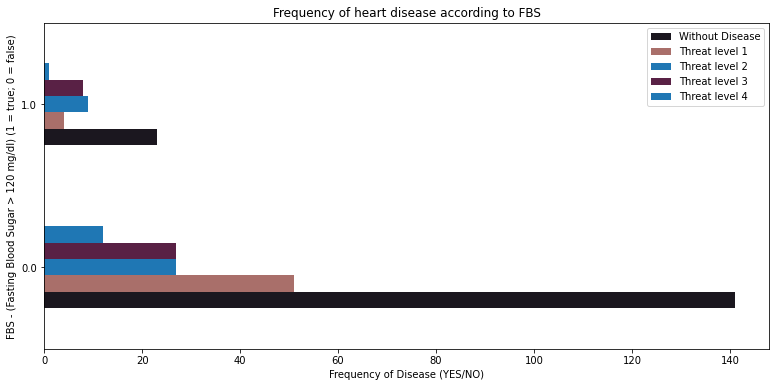

In [ ]:
pan.crosstab(data_set.fbs,data_set.num).plot(kind="barh",figsize=(13,6),color=['#1b171f','#a96f6a','#1f77b4','#592145','#1f77b4'])
mplot.title('Frequency of heart disease according to FBS')
mplot.ylabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
mplot.legend(["Without Disease","Threat level 1","Threat level 2","Threat level 3","Threat level 4"])
mplot.xlabel('Frequency of Disease (YES/NO)')
mplot.show()


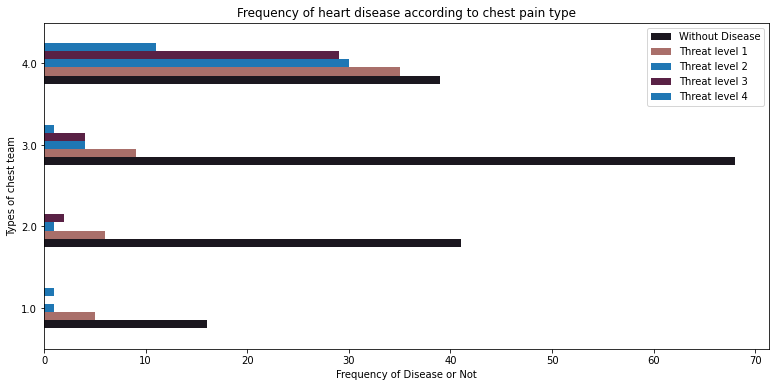

In [ ]:
pan.crosstab(data_set.cp,data_set.num).plot(kind="barh",figsize=(13,6),color=['#1b171f','#a96f6a','#1f77b4','#592145','#1f77b4'])
mplot.title('Frequency of heart disease according to chest pain type')
mplot.ylabel('Types of chest team')
mplot.xlabel('Frequency of Disease or Not')
mplot.legend(["Without Disease","Threat level 1","Threat level 2","Threat level 3","Threat level 4"])
mplot.show()

In [ ]:
a = pan.get_dummies(data_set['cp'], prefix = "cp")
b = pan.get_dummies(data_set['thal'], prefix = "thal")
c = pan.get_dummies(data_set['slope'], prefix = "slope")

In [ ]:
frames = [data_set, a, b, c]
data_set = pan.concat(frames, axis = 1)
data_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,cp_1.0,cp_2.0,cp_3.0,cp_4.0,thal_3.0,thal_6.0,thal_7.0,slope_1.0,slope_2.0,slope_3.0
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,1,0,0,0,0,1,0,0,0,1
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,0,0,0,1,1,0,0,0,1,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,0,0,0,1,0,0,1,0,1,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0,1,0,1,0,0,0,0,1
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
data_set = data_set.drop(columns = ['cp', 'thal', 'slope'])
data_set.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,num,cp_1.0,cp_2.0,cp_3.0,cp_4.0,thal_3.0,thal_6.0,thal_7.0,slope_1.0,slope_2.0,slope_3.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0.0,0,1,0,0,0,0,1,0,0,0,1
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,3.0,2,0,0,0,1,1,0,0,0,1,0
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1,0,0,0,1,0,0,1,0,1,0
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0.0,0,0,0,1,0,1,0,0,0,0,1
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0.0,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
y = data_set.num.values
x_data = data_set.drop(['num'], axis=1)


In [ ]:
# Here we are normalizing the data set
x = preprocessing.normalize(x_data)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
#Here we are transposing the matrix
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [ ]:
#Here we are initializing 
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [ ]:
def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [ ]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [ ]:
accurate_list = {}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
near = KNeighborsClassifier(n_neighbors = 2)  
near.fit(x_train.T, y_train.T)
prediction = near.predict(x_test.T)

print("The NN score is : {:.5f}%".format(2, near.score(x_test.T, y_test.T)*100))

The NN score is : 2.00000%


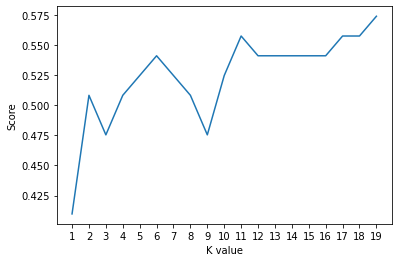

The Maximum vlaue of near Score is 57.37705%


In [ ]:
# Here we are finding best k value
scoreList = []
for i in range(1,20):
    near2 = KNeighborsClassifier(n_neighbors = i) 
    near2.fit(x_train.T, y_train.T)
    scoreList.append(near2.score(x_test.T, y_test.T))
    
mplot.plot(range(1,20), scoreList)
mplot.xticks(np.arange(1,20,1))
mplot.xlabel("K value")
mplot.ylabel("Score")
mplot.show()

acc = max(scoreList)*100
accurate_list['near'] = acc
print("The Maximum vlaue of near Score is {:.5f}%".format(acc))

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accurate_list['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 57.38%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accurate_list['Decision Tree'] = acc
print("The accuracy of Decision Tree {:.5f}%".format(acc))

The accuracy of Decision Tree 59.01639%


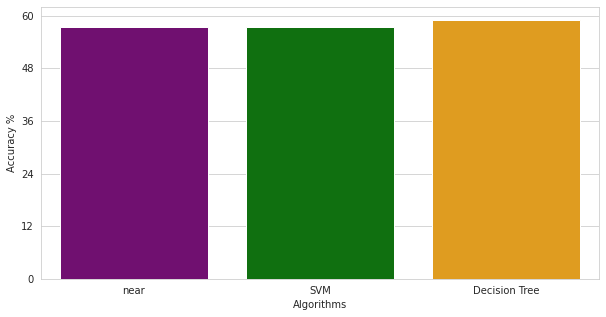

In [ ]:
colors = ["purple", "green", "orange"]
sbrn.set_style("whitegrid")
mplot.figure(figsize=(10,5))
mplot.yticks(np.arange(0,90,12))
mplot.ylabel("Accuracy %")
mplot.xlabel("Algorithms")
sbrn.barplot(x=list(accurate_list.keys()), y=list(accurate_list.values()), palette=colors)
mplot.show()

In [ ]:
# Here we are calcuating predicted values
near3 = KNeighborsClassifier(n_neighbors = 3)
near3.fit(x_train.T, y_train.T)
y_pred_near = near3.predict(x_test.T)
y_pred_svm = svm.predict(x_test.T)
y_pred_dtc = dtc.predict(x_test.T)


In [ ]:
from sklearn.metrics import confusion_matrix
conf_near = confusion_matrix(y_test,y_pred_near)
conf_svm = confusion_matrix(y_test,y_pred_svm)
conf_dtc = confusion_matrix(y_test,y_pred_dtc)


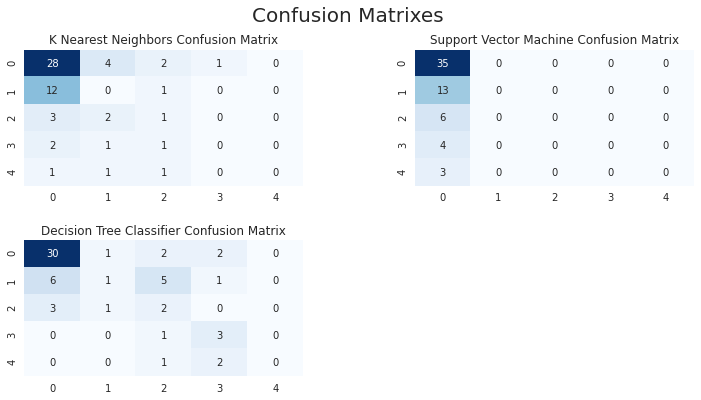

In [ ]:
mplot.figure(figsize=(12,6))
mplot.suptitle("Confusion Matrixes",fontsize=20)
mplot.subplots_adjust(wspace = 0.4, hspace= 0.4)
mplot.subplot(2,2,1)
mplot.title("K Nearest Neighbors Confusion Matrix")
sbrn.heatmap(conf_near,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 10})
mplot.subplot(2,2,2)
mplot.title("Support Vector Machine Confusion Matrix")
sbrn.heatmap(conf_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 10})
mplot.subplot(2,2,3)
mplot.title("Decision Tree Classifier Confusion Matrix")
sbrn.heatmap(conf_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 10})
mplot.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred_near))
#for KNN

              precision    recall  f1-score   support

           0       0.61      0.80      0.69        35
           1       0.00      0.00      0.00        13
           2       0.17      0.17      0.17         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3

    accuracy                           0.48        61
   macro avg       0.16      0.19      0.17        61
weighted avg       0.37      0.48      0.41        61



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73        35
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3

    accuracy                           0.57        61
   macro avg       0.11      0.20      0.15        61
weighted avg       0.33      0.57      0.42        61



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        35
           1       0.25      0.08      0.12        13
           2       0.10      0.17      0.12         6
           3       0.38      0.75      0.50         4
           4       0.00      0.00      0.00         3

    accuracy                           0.57        61
   macro avg       0.30      0.37      0.31        61
weighted avg       0.53      0.57      0.54        61



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
